# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "./train.p"
testing_file = "./test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
# X_train, y_train = train['features'], train['labels']
# X_test, y_test = test['features'], test['labels']

## The following are added to test the simpl network used to classify traffic signs to classfy more complex pictures
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


In [2]:
X_train.shape

(50000, 3, 32, 32)

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [3]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = y_train.shape[0]

# TODO: Number of testing examples.
n_test = y_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1], X_train.shape[2]

# TODO: How many unique classes/labels there are in the dataset.
import numpy as np
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 50000
Number of testing examples = 10000
Image data shape = (3, 32)
Number of classes = 10


In [4]:
print(X_train[0].shape)

(3, 32, 32)


In [5]:
X_test.shape

(10000, 3, 32, 32)

In [6]:
test_data = X_train[0]

In [7]:
plt.imshow(np.transpose(test_data))

NameError: name 'plt' is not defined

In [8]:
### reshape for the cifar data
X_train = np.transpose(X_train, axes=[0, 2, 3, 1])
X_test = np.transpose(X_test, axes=[0, 2, 3, 1])

In [9]:
plt.imshow(X_train[5])

NameError: name 'plt' is not defined

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

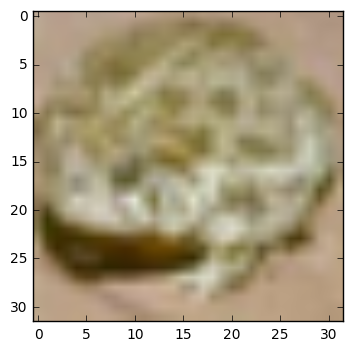

In [10]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
plt.imshow(X_train[209])

In [11]:
unique, counts = np.unique(y_train, return_counts = True)
print(dict(zip(unique, counts)))

{0: 5000, 1: 5000, 2: 5000, 3: 5000, 4: 5000, 5: 5000, 6: 5000, 7: 5000, 8: 5000, 9: 5000}


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [12]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
# scale the values to between 0 and 1
# X_train = X_train / 255 
# train data normalizing sholud be done later, after the image generator
X_test = X_test / 255


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:** I scaled the rgb values to the range between 0 and 1. This is called normalizing and will help to avoid numerical issues during training.

In [13]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

import numpy as np
from image_functions import crop, augment_brightness_camera_images, add_random_shadow
import cv2
        
    
def mutate_images(x, n, method):
    """
    get the cropped version of images in x
    """
    fake_images = []
    for image in x:
        if method == "crop":
            fake_images += crop_img(image)  # do the actual cropping
        elif method == "rotate":
            fake_images += rotate_img(image)
        if (len(fake_images) >= n):
            break
    return fake_images

def rotate_img(x):
    rotated_images = []
    rows = img.shape[0]
    cols = img.shape[1]
    M = cv2.getRotationMatrix2D((cols,rows),-5,1)
    dst = cv2.warpAffine(img,M,(cols,rows))
    rotated_images.append(dst)
    M2 = cv2.getRotationMatrix2D((cols, rows), 5, 1)
    dst2 = cv2.warpAffine(img, M2, (cols, rows))
    rotated_images.append(dst2)
    return [x.astype(np.uint8) for x in rotated_images]
    
def crop_img(x):
    """
        crop a single image x, return result as a list
    """
    croped_images = []
    croped_images.append(crop(x, 4, "top"))   # shift the image 4 pixels down, ie, add zeros on the top
    croped_images.append(crop(x, 4, "top_left"))
    croped_images.append(crop(x, 4, "top_right"))
    croped_images.append(crop(x, 4, "bottom_left"))
    croped_images.append(crop(x, 4, "bottom_right"))
    croped_images.append(crop(x, 4, "bottom"))
    croped_images.append(crop(x, 4, "left"))
    croped_images.append(crop(x, 4, "right"))
    croped_images.append(crop(x, 8, "top"))
    croped_images.append(crop(x, 8, "bottom"))
    croped_images.append(crop(x, 8, "left"))
    croped_images.append(crop(x, 8, "right"))
    return croped_images

def get_fake_data(x, n, method):
    """ get n fake samples based on the original data x, x should be of a single class in the training data
    x: the original data
    n: the number of fake samples needed, may not be satisfied
    """
    fake_data = mutate_images(x, n, method)    # get fake data by croping the original images
    
    num = min(n, len(fake_data))
    return fake_data[0:num - 1]

def get_fake_data_for_all_class(X_train, y_train, expected_num_per_class, method):
    """ get fake data for all classes, only expected_num_per_class - current sample number in the class fake 
        images are produced using shift (the function crop here) and rotate.
    """
    
    unique, counts = np.unique(y_train, return_counts = True)

    class_counts = dict(zip(unique, counts))
    
    # generate fake data for each class
    fake_data = {}
    for label in class_counts.keys():
        images = X_train[y_train == label]
        fake_data[label] = get_fake_data(images, expected_num_per_class - class_counts.get(label), method)
    
    # combinen the generated fake data and the original data together
    for label in fake_data.keys():
        fake_images = fake_data.get(label)
        fake_images_num = len(fake_images)
        fake_images_array = np.array(fake_images)
        fake_image_labels_array = (np.ones(fake_images_num) * label).astype(np.uint8)
        X_train = np.vstack((X_train, fake_images_array))
        y_train = np.hstack((y_train, fake_image_labels_array))
    return X_train, y_train
 
# each class will have exactly 2300 samples after this operation
# X_train, y_train = get_fake_data_for_all_class(X_train, y_train, 2300, "crop")


# split data in to training, validation and test set
import math
sample_size = X_train.shape[0]
selector = np.arange(sample_size)
np.random.shuffle(selector)
train_selector = selector[0 : math.floor(sample_size * 0.8)]

valid_selector = selector[math.floor(sample_size * 0.8) : sample_size - 1]
train_data, train_label = X_train[train_selector], y_train[train_selector]
valid_data, valid_label = X_train[valid_selector], y_train[valid_selector]
test_data, test_label = X_test, y_test
valid_data = valid_data / 255

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:** 
1. I generated some fake data to make the number of classes balanced, next I randomly shuffle the whole data set, then I split the data ramdomly into training, validation and test set with ration 0.6 : 0.2 : 0.2
2. I generated some fake data here by shifting the original image 4 and 8 pixels down / up / left / right and the combination of these directions
3. I generated the fake data here only to make the samples in each class balanced, some more complex method are used in the following part to generate more data for the training part. 
4. they contain the same set of images, but traffic sign in the generated data will be in a different position
5. Methods used in the following training part are: randomly shift or zoom the image using the keras image preporcessing module and the generated data will be further modified by randomly changing brightness and add random shadows.
6. Shifting transformation is used since the traffic sign will actually be in different part of the image; zooming is used to simulate seeing the traffic sign at different distance; random brightness is used to simulate different lighting conditions; randoms shadows is used to simulate clouds, trees and so on which will cast a shadow on the traffic sign.
7. Random shadows are added to the generated images, which is not present or not present in the simple way I used.



In [14]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

from tensorflow.contrib.layers import flatten
def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1

    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x32.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 32), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(32))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x32. Output = 14x14x32.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x90.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 32, 90), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(90))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b

    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)
    conv2 = tf.nn.dropout(conv2, 0.5)

    # SOLUTION: Pooling. Input = 10x10x90. Output = 5x5x90.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x90. Output = 2250.
    fc0   = flatten(conv2)

    # SOLUTION: Layer 3: Fully Connected. Input = 2250. Output = 336.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(2250, 336), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(336))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b

    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 336. Output = 80.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(336, 80), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(80))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b

    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    
    # Layer 6: Fully Connected. Input = 80. output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(80, 10), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(10))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    

    return logits

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**
1. The architecture is:
    a. convolutional layer with 6 5x5x3 filters, strides are 1x1
    b. max polling layer with 2x2 filters, strides are 2x2
    c. convolutional layer with 16 5x5x6 filters, strides are 1x1
    d. max polling layer with 2x2 filters, strides are 2x2
    e. fully connected layer with 504 neurons
    f. fully connected layer with 336 neurons
    g. fully connected layer with 80 neurons
    h. output layer with 43 neurons
    
     this architucture is based on the lenet architecture used in the class, and I made several changes
2. The input are rgb images, so I changed the dimension of the filters in the first convolution layer
3. I added one more fully connected layer, since my initial training tryings give me an accuracy of about 92% on the training set, so I think the capacity of the network should be increased.
4. The number of neurons in the fully connected layer is also increased since the number of output classes is larger than in the case of lenet.

In [15]:
### Train your model here.
### Feel free to use as many code cells as needed.
# the code here is based on those used in the course
from sklearn.utils import shuffle

BATCH_SIZE = 256


import tensorflow as tf
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 10)

rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        print("batch_x: ", batch_x.shape)
        print("batch_y: ", batch_y.shape)
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
      
        width_shift_range=0.2,
        height_shift_range=0.2,
       
        zoom_range=0.2,

        fill_mode='nearest')

save_file = "/Users/michael/Documents/learn/self-driving-car/assignments/CarND-Traffic-Sign-Classifier-Project/lenetd.ckpt"

import os.path
with tf.Session() as sess:
    #if os.path.exists(save_file + ".meta"):
        # tf.reset_default_graph()
    #   saver.restore(sess, save_file)
    #else:
    sess.run(tf.global_variables_initializer())
    
    # num_examples = len(train_data)
    total_batch = 500
    print("Training...")
    print()
    batch = datagen.flow(train_data, train_label, batch_size=BATCH_SIZE, shuffle=True)
    for i in range(total_batch):
        batch_x, batch_y = next(batch)
        for j in range(batch_x.shape[0]):
            batch_x[j] = add_random_shadow(augment_brightness_camera_images(batch_x[j]))
            batch_x[j] = batch_x[j] / 255
        sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        if i % 1000 == 0:
            validation_accuracy = evaluate(valid_data, valid_label)
            print("BATCH {} ...".format(i+1))
            print("Validation Accuracy = {:.3f}".format(validation_accuracy))
            print()
            # saver.save(sess, save_file)
           
        
    saver.save(sess, save_file)
    print("Model saved")

Training...

batch_x:  (256, 32, 32, 3)
batch_y:  (256, 1)


InvalidArgumentError: Incompatible shapes: [256] vs. [256,10]
	 [[Node: Equal = Equal[T=DT_INT64, _device="/job:localhost/replica:0/task:0/cpu:0"](ArgMax, ArgMax_1)]]

Caused by op 'Equal', defined at:
  File "/Users/michael/apps/anaconda3/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/michael/apps/anaconda3/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/michael/apps/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/Users/michael/apps/anaconda3/lib/python3.5/site-packages/traitlets/config/application.py", line 653, in launch_instance
    app.start()
  File "/Users/michael/apps/anaconda3/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "/Users/michael/apps/anaconda3/lib/python3.5/site-packages/zmq/eventloop/ioloop.py", line 162, in start
    super(ZMQIOLoop, self).start()
  File "/Users/michael/apps/anaconda3/lib/python3.5/site-packages/tornado/ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "/Users/michael/apps/anaconda3/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/michael/apps/anaconda3/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/Users/michael/apps/anaconda3/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/Users/michael/apps/anaconda3/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/Users/michael/apps/anaconda3/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/michael/apps/anaconda3/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Users/michael/apps/anaconda3/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/Users/michael/apps/anaconda3/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "/Users/michael/apps/anaconda3/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/michael/apps/anaconda3/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/michael/apps/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/michael/apps/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/Users/michael/apps/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-15-372126512e9a>", line 22, in <module>
    correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
  File "/Users/michael/apps/anaconda3/lib/python3.5/site-packages/tensorflow/python/ops/gen_math_ops.py", line 728, in equal
    result = _op_def_lib.apply_op("Equal", x=x, y=y, name=name)
  File "/Users/michael/apps/anaconda3/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py", line 759, in apply_op
    op_def=op_def)
  File "/Users/michael/apps/anaconda3/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 2240, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/Users/michael/apps/anaconda3/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1128, in __init__
    self._traceback = _extract_stack()

InvalidArgumentError (see above for traceback): Incompatible shapes: [256] vs. [256,10]
	 [[Node: Equal = Equal[T=DT_INT64, _device="/job:localhost/replica:0/task:0/cpu:0"](ArgMax, ArgMax_1)]]


In [ ]:
# Evaluate the model
import tensorflow as tf
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(test_data, test_label)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**
1. I train the model using AdamOptimizer,
2. Batch size is 128,
3. I use keras imagegenerator, so no need to go over the training set multiple times,
4. There is no need to set hyperparameters since AdamOptimizer is used,
5. In the begining learning rate is 0.001, then I lower it to 0.0001, and eventually it goes to 0.00001.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**
1. I used the lenet architecture with minimum modification from the course as a starting point
2. I print out both the training and validation accuracy during training, I found out that both the traing and validation accuracy is low, about 92% on the training set
3. Since the training accuracy is low, I decided to increase the capacity of the model by increasing the number of neurons in the fully connected layer, then I read somewhere on the web that the primary method for increasing neuronal network capacity is adding more layers, So I added one more fully connected layer.
4. At this point, the result is even worse than the original simple networ, so I decided to use more training data
5. After talking with my Mentor, he suggested a blog which I read and the approach in the blog is adopted. The approach is using shifting, zooming, changing brightness， adding random shadow to generate new data （originally the method came into my mind is shifting, zooming, rotating and shear transformation）
6. with the save and restore feature of tensorflow and keras imgaegenerator, I train the network and the accuracy on the validation set increase to about 97%.
7. There is one potential problem, In order to save training time, the model is saved during different run of the training session, but the processing of spliting data into traing, validation and test set is also occured multiple times due to machine shutdown or kernel restarting, so there is a chance that the model have see the validation data ，however, the good news is that all training data is from the keras imagegenerator, so even the model have seen the validation data, what it have seen is not exactly the same with those in the validation set.



---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



In [ ]:
### Load the images and plot them here.

### Feel free to use as many code cells as needed.
import cv2
import os.path

images = []
for filename in os.listdir("./traffic_sign_web"):
    if filename.endswith(".png") or filename.endswith(".jpeg") or filename.endswith("jpg"): 
        # print(os.path.join(directory, filename))
        image = cv2.imread("./traffic_sign_web/" + filename)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        images.append(image)
    else:
        continue

In [ ]:
plt.imshow(images[0])

In [ ]:
plt.imshow(images[1])

In [ ]:
plt.imshow(images[2])

In [ ]:
plt.imshow(images[3])

In [ ]:
plt.imshow(images[4])

In [ ]:
def resize(image):
    return cv2.resize(image, (0,0), fx = 32 / image.shape[1], fy = 32 / image.shape[0])

In [ ]:
images = np.array([resize(x) for x in images])

In [ ]:
labels = np.array([38, 26, 14, 26, 17])

In [ ]:
# accuracy on the pictures
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(images, labels)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

In [ ]:
# actual predictions for the pictures
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    prediction  = sess.run(tf.argmax(logits, 1), feed_dict = {x: images, y: labels})
    print(prediction)

In [ ]:
# filter out training samples for class 38, keep right
keep_right = X_train[y_train == 38]

In [ ]:
plt.imshow(keep_right[1000])

In [ ]:
# filter out training samples for class 26, traffic signs
traffic_signals = X_train[y_train == 26]

In [ ]:
plt.imshow(traffic_signals[1500])

**Answer:** 
1. the keep right sign I found on the web is actually very different from those in the training set, it does not surprise me that the model does not give the right answer for it
2. The traffic signs in the training set in the shape of a triangle, and the images[1] above is in the shape of a diamond

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**
it's not, the model correctly classify 3 signs out of 5.

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
prediction = None
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    prediction  = sess.run((tf.nn.softmax(logits)), feed_dict = {x: images, y: labels})


N = 5

colors = {0: 'b', 1: 'g', 2: 'r', 3: 'c', 4: 'm', 5: 'y'}

ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence
p = []
for i in range(prediction.shape[1]):
    if i == 0:
        p.append(plt.bar(ind, prediction[:,i], width,  color = colors.get(i % 6)))
    else:
        p.append(plt.bar(ind, prediction[:, i], width, color = colors.get(i % 6),
             bottom=prediction[:, i-1]))

plt.ylabel('Probabilities')
plt.title('Probabilities by picture and class')
plt.xticks(ind + width/2., ('P1', 'P2', 'P3', 'P4', 'P5'))
plt.yticks(np.arange(0, 1, 0.05))

plt.show()

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
prediction = None
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    prediction  = sess.run(tf.nn.top_k(tf.nn.softmax(logits), k=5), feed_dict = {x: images, y: labels})
    print(prediction)
    

**Answer:**
Looking at the top 5 softmax values above, I can see that the model is not certain abount the predictions for the two pictures that are false classified, and the correct answer is not even in the top 5;
But it's quite certain in the case of the correctly classified ones.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.